## Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Flatten 
from sklearn.model_selection import train_test_split


## Loading dataset

In [2]:
df=pd.read_csv("A_Z Handwritten Data.csv")

In [3]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(372450, 785)

In [5]:
labels = df.iloc[:, 0].values
images = df.iloc[:, 1:].values


In [9]:
num_images = images.shape[0]
image_size = 28 
images = images.reshape(num_images, image_size, image_size,)

## Splitting the data into train and test

In [13]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [14]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_train shape: (297960, 28, 28)
y_train shape: (297960,)
x_test shape: (74490, 28, 28)
y_test shape: (74490,)


### Creating a list of class names representing the uppercase letters of the English alphabet, from 'A' to 'Z'

In [84]:
class_names = [chr(i) for i in range(65, 91)]

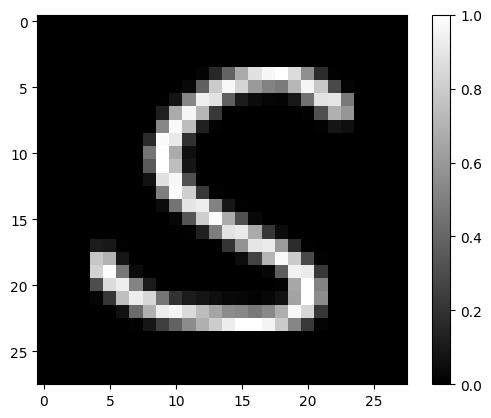

In [83]:
plt.figure()
plt.imshow(x_train[1], cmap='gray')  
plt.colorbar()
plt.grid(False)
plt.show()

## Scaling the values in the range of 0 to 1

In [18]:
x_test=x_test/255.0
x_train=x_train/255.0

## Displaying first 10 images with class

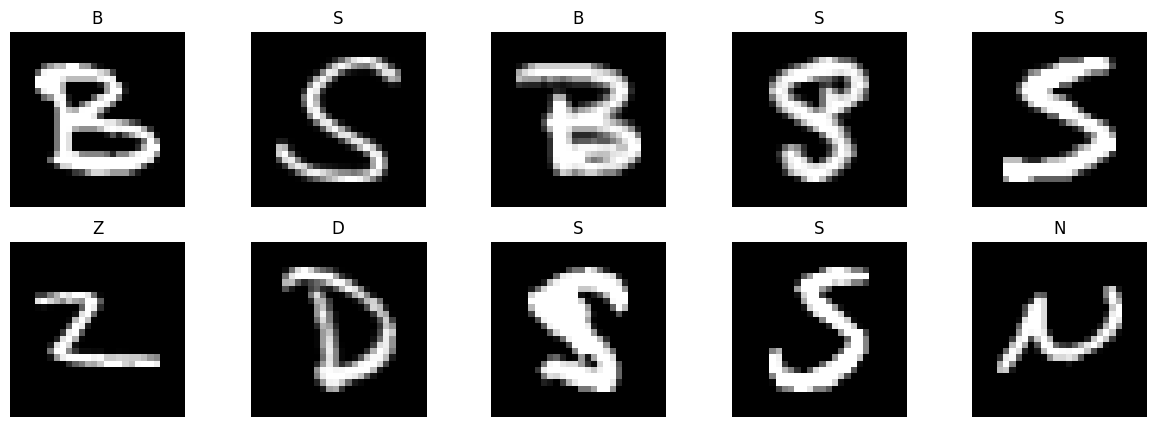

In [19]:
plt.figure(figsize=(15, 5)) 
for i in range(10):
    plt.subplot(2, 5, i + 1) 
    plt.imshow(x_train[i], cmap='gray')  
    plt.title(class_names[y_train[i]])  
    plt.axis('off')  
plt.show()

### Converting each flattened image back to its original 2D shape of 28x28 pixels.

In [21]:
x_train = x_train.reshape(-1, 28, 28)

## Building Neural Network Model

### Setting up Layers

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dense(512, activation='relu'),  
    tf.keras.layers.Dense(1024, activation='relu'),  
    tf.keras.layers.Dense(26)  
])

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling and Fitting the model

In [26]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20)


Epoch 1/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.8888 - loss: 0.3868
Epoch 2/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 102s 11ms/step - accuracy: 0.9621 - loss: 0.1312
Epoch 3/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 59s 6ms/step - accuracy: 0.9697 - loss: 0.1040
Epoch 4/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 54s 6ms/step - accuracy: 0.9746 - loss: 0.0907
Epoch 5/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 56s 6ms/step - accuracy: 0.9770 - loss: 0.0816
Epoch 6/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 69s 7ms/step - accuracy: 0.9792 - loss: 0.0743
Epoch 7/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - accuracy: 0.9804 - loss: 0.0707
Epoch 8/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 120s 13ms/step - accuracy: 0.9822 - loss: 0.0647
Epoch 9/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - accuracy: 0.9833 - loss: 0.0619
Epoch 10/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 56s 6ms/step - accuracy: 0.9838 - loss: 0.0628
Epoch 11/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 57s 6ms/step - accuracy: 0.9844 - loss: 0.0582
Epoch 12/20
931

## Calculating the accuracy on test dataset

In [27]:
loss,acc=model.evaluate(x_test,y_test)
print(loss,acc)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9820 - loss: 0.1021
0.09720876067876816 0.9830849766731262


## Training Set Accuracy = 98.63%
## Test Set Accuracy = 98.30%

## Making Prediction

In [69]:
from scipy.special import softmax  
from sklearn.metrics import accuracy_score

In [73]:
predictions = model.predict(x_test)
probabilities = softmax(predictions, axis=-1)
predicted_labels = np.argmax(probabilities, axis=-1)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [74]:
class_names = [chr(i) for i in range(65, 91)]  # ['A', 'B', 'C', ..., 'Z']

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(26))
    plt.yticks([])
    thisplot = plt.bar(range(26), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

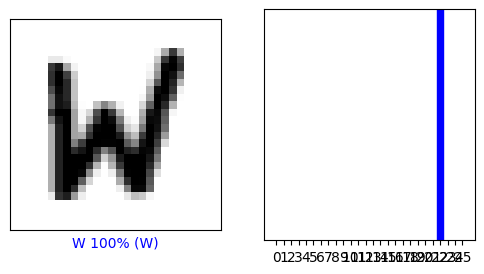

In [85]:
i = 9
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, probabilities[i], y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, probabilities[i], y_test)
plt.show()